<a href="https://colab.research.google.com/github/Jun-Liu-291/horse-and-human/blob/master/horse%26human_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
from keras import layers
from keras import models
from keras import optimizers

# build a new model with a dropout layer (drop out rate is 0.5)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-3),
metrics=['acc'])

Using TensorFlow backend.


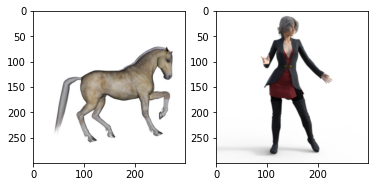

the shape of the input horse image is : (300, 300, 3)
the shape of the input human image is : (300, 300, 3)


In [ ]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

validation_horses_dir = '/content/drive/My Drive/dataset/horse-or-human/validation/horses'
validation_humans_dir = '/content/drive/My Drive/dataset/horse-or-human/validation/humans'
fnames_horses = [os.path.join(validation_horses_dir, fname) for fname in os.listdir(validation_horses_dir)]
fnames_humans = [os.path.join(validation_humans_dir, fname) for fname in os.listdir(validation_humans_dir)]

img_path1 = fnames_horses[12]
img_path2 = fnames_humans[15]

img1 = image.load_img(img_path1)
img2 = image.load_img(img_path2)

x1 = image.img_to_array(img1)
x2 = image.img_to_array(img2)

plt.figure(1)
plt.subplot(1,2,1)
imgplot = plt.imshow(img1)
plt.subplot(1,2,2)
imgplot = plt.imshow(img2)
plt.show()

print("the shape of the input horse image is :", x1.shape)
print("the shape of the input human image is :", x2.shape)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 20
epoch_lenth = 150
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

train_dir = '/content/drive/My Drive/dataset/horse-or-human/train'
validation_dir = '/content/drive/My Drive/dataset/horse-or-human/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (1 - 9*epoch*1e-3))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/150
100/100 [==============================] - 404s 4s/step - loss: 0.7599 - acc: 0.5866 - val_loss: 0.5952 - val_acc: 0.4949
Epoch 2/150
100/100 [==============================] - 131s 1s/step - loss: 0.5878 - acc: 0.7229 - val_loss: 1.0049 - val_acc: 0.5600
Epoch 3/150
100/100 [==============================] - 131s 1s/step - loss: 0.4587 - acc: 0.8343 - val_loss: 1.9761 - val_acc: 0.5813
Epoch 4/150
100/100 [==============================] - 130s 1s/step - loss: 0.3070 - acc: 0.8845 - val_loss: 1.0713 - val_acc: 0.7124
Epoch 5/150
100/100 [==============================] - 128s 1s/step - loss: 0.3300 - acc: 0.8921 - val_loss: 0.7264 - val_acc: 0.6189
Epoch 6/150
100/100 [==============================] - 128s 1s/step - loss: 0.2395 - acc: 0.9159 - val_loss: 1.0908 - val_acc: 0.8211
Epoch 7/150
100/100 [==============================] - 128s 1s/step - loss: 0.1676 - acc: 0.9341 - val_loss: 3.9922 - val_acc: 0.6832
Epoch 8/150
100/100 [==============================] - 128s 1s

KeyboardInterrupt: ignored

Summary: even for same type of problem (same aim: binary classification, similar size dataset: small size around thousands), same model cannot solve all the problems.

Guess the reason:
1. horses are totally different from human, while dogs and cats are quit similar.
2. The background of cat&dog dataset is complicated, while horse&human dataset are generated by computer, which has pure white background.
3. Training set only has around 1000 images, while the dog&cat has 2000 images.

Therfore, this problem is less complicated than the former one. Try less layers next time.